In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
traindataset = pd.read_csv(r"C:\Users\gg52830\Desktop\Scripts\python\JupyterNotebook\Datasets\housePred\train.csv")
testdataset = pd.read_csv(r"C:\Users\gg52830\Desktop\Scripts\python\JupyterNotebook\Datasets\housePred\test.csv")

In [3]:
trainset = traindataset.drop(['SalePrice'], axis=1)
dataset = pd.concat([trainset, testdataset], axis=0)

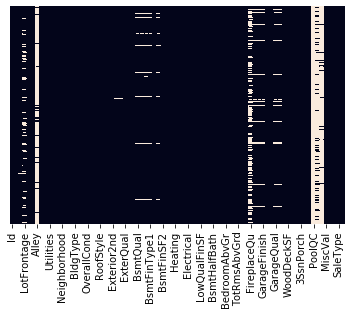

In [4]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

In [5]:
dataset = dataset.drop(['Alley'], axis=1)
dataset = dataset.drop(['PoolQC'], axis=1)

In [6]:
dataset = dataset.drop(['MiscFeature'], axis=1)
dataset = dataset.drop(['Id'], axis=1)

In [7]:
columns = ['MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond','RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars','GarageQual', 'GarageCond',
       'PavedDrive', '3SsnPorch',
       'PoolArea', 'Fence', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition']

In [8]:
for col in columns:
    if is_numeric_dtype(dataset[col].head(1)):
        dataset[col] = dataset[col].fillna(dataset[col].mean())
    else:
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])
        dataset[col] = pd.get_dummies(dataset[col])

In [9]:
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean())

In [10]:
dataset = dataset.drop(['GarageYrBlt'], axis=1)
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mean())

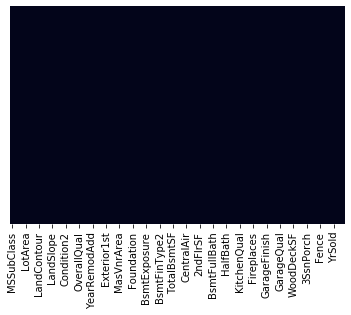

In [11]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

In [12]:
dataset = dataset.drop(['BsmtFinSF1'], axis=1)

In [13]:
dataset['GarageArea'] = dataset['GarageArea'].fillna(dataset['GarageArea'].mean())
dataset['BsmtFinSF2'] = dataset['BsmtFinSF2'].fillna(dataset['BsmtFinSF2'].mean())
dataset['BsmtUnfSF'] = dataset['BsmtUnfSF'].fillna(dataset['BsmtUnfSF'].mean())
dataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].fillna(dataset['TotalBsmtSF'].mean())

In [14]:
x_train = dataset[:1460]
x_test = traindataset['SalePrice']
y_train = dataset[1460:]

In [15]:
import xgboost
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, x_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
classifier = xgboost.XGBRegressor()
classifier.fit(x_train, x_test)
classifier.score(x_train, x_test)

0.9993332168439697

In [17]:
pred = classifier.predict(y_train)

In [24]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor(n_estimators=500)
random.fit(x_train, x_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
pred = random.predict(y_train)
random.score(x_train, x_test)

0.9813242605150255

In [27]:
import pickle
filename  = r'C:\Users\gg52830\Desktop\Scripts\python\JupyterNotebook\Datasets\housePred\finalized_model_random.pkl'
pickle.dump(random, open(filename, 'wb'))

In [28]:
#create a submission file and submit
pred = pd.DataFrame(pred)
sub_df = pd.read_csv(r"C:\Users\gg52830\Desktop\Scripts\python\JupyterNotebook\Datasets\housePred\sample_submission.csv")
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns=['Id', 'SalePrice']
datasets.to_csv(r"C:\Users\gg52830\Desktop\Scripts\python\JupyterNotebook\Datasets\housePred\sample_submission.csv", index=False)